In [ ]:
from google.colab import drive
drive.mount('/content/drive')


folder_path = '/content/drive/MyDrive/titanic/'



Mounted at /content/drive


In [ ]:
!pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 3.3 MB/s eta 0:00:00


In [ ]:

# Read the CSV file
df  = pd.read_csv(folder_path + 'train1.csv')
dft  = pd.read_csv(folder_path + 'test1.csv')

testcopy=dft.copy()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

import xgboost as xgb




In [ ]:
def print_nan_zero_percentage(dataset):
    total_rows = len(dataset)

    # Calculate percentage of NaN and 0 values for each column
    nan_zero_percentage = []
    for column in dataset.columns:
        nan_percentage = dataset[column].isna().sum() / total_rows * 100
        zero_percentage = (dataset[column] == 0).sum() / total_rows * 100

        nan_zero_percentage.append((column, nan_percentage, zero_percentage))

    # Sort the percentages in descending order based on NaN percentage
    sorted_nan_zero_percentage = sorted(nan_zero_percentage, key=lambda x: x[1], reverse=True)

    # Print the sorted percentages
    for column, nan_percentage, zero_percentage in sorted_nan_zero_percentage:
        print(f"Column: {column}")
        print(f"NaN Percentage: {nan_percentage:.2f}%")
        print(f"Zero Percentage: {zero_percentage:.2f}%")
        print("------------------------")


In [ ]:
le = LabelEncoder()
testcopy = dft["PassengerId"].copy()
dfcopy=df.copy()
dfcopy.dropna(inplace=True)
dfcopy.info()
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6606 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   6606 non-null   object 
 1   HomePlanet    6606 non-null   object 
 2   CryoSleep     6606 non-null   object 
 3   Cabin         6606 non-null   object 
 4   Destination   6606 non-null   object 
 5   Age           6606 non-null   float64
 6   VIP           6606 non-null   object 
 7   RoomService   6606 non-null   float64
 8   FoodCourt     6606 non-null   float64
 9   ShoppingMall  6606 non-null   float64
 10  Spa           6606 non-null   float64
 11  VRDeck        6606 non-null   float64
 12  Name          6606 non-null   object 
 13  Transported   6606 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 729.0+ KB


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [ ]:
#df
# For numerical columns
for col in df.select_dtypes(include=[np.number]).columns:
    df[col] = df[col].fillna(df[col].median())

# For categorical columns
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [ ]:
#df
# For numerical columns
for col in dft.select_dtypes(include=[np.number]).columns:
    dft[col] = dft[col].fillna(dft[col].median())

# For categorical columns
for col in dft.select_dtypes(include=['object']).columns:
    dft[col] = dft[col].fillna(dft[col].mode()[0])
dft

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,G/160/P,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,26.0,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,TRAPPIST-1e,26.0,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [ ]:
import pandas as pd

def feature_engineering(df):
    # Splitting the 'Cabin' column
    df[['Deck','Room','Area']] = df.Cabin.str.split('/',expand=True)

    # Creating 'LastName' column
    df['LastName'] = df['Name'].apply(lambda x: x.split(' ')[-1])

    # Creating 'NumberOfRelatives' column
    df['NumberOfRelatives'] = df.groupby('LastName')['LastName'].transform('count') - 1



    return df
df=feature_engineering(df)
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Room,Area,LastName,NumberOfRelatives
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P,Ofracculy,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S,Vines,3
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S,Susent,5
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S,Susent,5
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S,Santantines,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,A,98,P,Noxnuther,2
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,G,1499,S,Mondalley,1
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,G,1500,S,Connon,5
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,E,608,S,Hontichre,5


In [ ]:
dft=feature_engineering(dft)
dft

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Deck,Room,Area,LastName,NumberOfRelatives
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,G,3,S,Carsoning,3
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,F,4,S,Peckers,0
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,C,0,S,Unhearfus,0
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,C,1,S,Caltilter,0
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,F,5,S,Harperez,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,G,1496,S,Peter,3
4273,9269_01,Earth,False,G/160/P,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,G,160,P,Scheron,1
4274,9271_01,Mars,True,D/296/P,55 Cancri e,26.0,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,D,296,P,Pore,3
4275,9273_01,Europa,False,D/297/P,TRAPPIST-1e,26.0,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,D,297,P,Conale,4


In [ ]:
for col in df.select_dtypes(include=[np.number]).columns:
    df[col] = df[col].fillna(df[col].median())

# For categorical columns
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])
categorical_cols = df.select_dtypes(include=['object','boolean']).columns
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))
    df[col] = df[col].fillna(df[col].median())

df.drop(['PassengerId',"Name"],axis=1, inplace=True)
df

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Room,Area,LastName,NumberOfRelatives
0,1,0,149,2,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1431,0
1,0,0,2184,2,24.0,0,109.0,9.0,25.0,549.0,44.0,1,5,0,1,2109,3
2,1,0,1,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0,0,1,1990,5
3,1,0,1,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0,0,1,1990,5
4,0,0,2186,2,16.0,0,303.0,70.0,151.0,565.0,2.0,1,5,1,1,1778,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,146,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0,0,1795,0,1416,2
8689,0,1,5280,1,18.0,0,0.0,0.0,0.0,0.0,0.0,0,6,548,1,1341,1
8690,0,0,5285,2,26.0,0,0.0,0.0,1872.0,1.0,0.0,1,6,551,1,470,5
8691,1,0,2131,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0,4,1385,1,996,5


In [ ]:

for col in dft.select_dtypes(include=[np.number]).columns:
    dft[col] = dft[col].fillna(dft[col].median())

# For categorical columns
for col in dft.select_dtypes(include=['object']).columns:
    dft[col] = dft[col].fillna(dft[col].mode()[0])
categorical_cols = dft.select_dtypes(include=['object','boolean']).columns
for col in categorical_cols:
    dft[col] = le.fit_transform(dft[col].astype(str))
    dft[col] = dft[col].fillna(dft[col].median())
dft.drop(['PassengerId',"Name"],axis=1, inplace=True)
dft

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Room,Area,LastName,NumberOfRelatives
0,0,1,2784,2,27.0,0,0.0,0.0,0.0,0.0,0.0,6,820,1,275,3
1,0,0,1867,2,19.0,0,0.0,9.0,0.0,2823.0,0.0,5,927,1,1190,0
2,1,1,257,0,31.0,0,0.0,0.0,0.0,0.0,0.0,2,0,1,1604,0
3,1,0,259,2,38.0,0,0.0,6652.0,0.0,181.0,585.0,2,1,1,262,0
4,0,0,1940,2,20.0,0,10.0,0.0,635.0,0.0,0.0,5,1029,1,736,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0,1,2679,2,34.0,0,0.0,0.0,0.0,0.0,0.0,6,452,1,1209,3
4273,0,0,2691,2,42.0,0,0.0,847.0,17.0,10.0,144.0,6,526,0,1401,1
4274,2,1,602,0,26.0,0,0.0,0.0,0.0,0.0,0.0,3,816,0,1241,3
4275,1,0,603,2,26.0,0,0.0,2680.0,0.0,0.0,523.0,3,817,0,362,4


In [ ]:

def remove_outliers(df):
    Q1 = df.quantile(0.01)
    Q3 = df.quantile(0.98)
    IQR = Q3 - Q1

    df_out = df[~((df < (Q1 - 1 * IQR)) | (df > (Q3 + 1 * IQR))).any(axis=1)]
    return df_out
df=remove_outliers(df)
df

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Room,Area,LastName,NumberOfRelatives
0,1,0,149,2,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1431,0
1,0,0,2184,2,24.0,0,109.0,9.0,25.0,549.0,44.0,1,5,0,1,2109,3
2,1,0,1,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0,0,1,1990,5
3,1,0,1,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0,0,1,1990,5
4,0,0,2186,2,16.0,0,303.0,70.0,151.0,565.0,2.0,1,5,1,1,1778,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,146,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0,0,1795,0,1416,2
8689,0,1,5280,1,18.0,0,0.0,0.0,0.0,0.0,0.0,0,6,548,1,1341,1
8690,0,0,5285,2,26.0,0,0.0,0.0,1872.0,1.0,0.0,1,6,551,1,470,5
8691,1,0,2131,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0,4,1385,1,996,5


In [ ]:


X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['Transported'], axis=1),
    df['Transported'],
    test_size=0.15,
    random_state=42
)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8477 entries, 0 to 8692
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   HomePlanet         8477 non-null   int64  
 1   CryoSleep          8477 non-null   int64  
 2   Cabin              8477 non-null   int64  
 3   Destination        8477 non-null   int64  
 4   Age                8477 non-null   float64
 5   VIP                8477 non-null   int64  
 6   RoomService        8477 non-null   float64
 7   FoodCourt          8477 non-null   float64
 8   ShoppingMall       8477 non-null   float64
 9   Spa                8477 non-null   float64
 10  VRDeck             8477 non-null   float64
 11  Transported        8477 non-null   int64  
 12  Deck               8477 non-null   int64  
 13  Room               8477 non-null   int64  
 14  Area               8477 non-null   int64  
 15  LastName           8477 non-null   int64  
 16  NumberOfRelatives  8477 

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7205 entries, 6013 to 7458
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   HomePlanet         7205 non-null   int64  
 1   CryoSleep          7205 non-null   int64  
 2   Cabin              7205 non-null   int64  
 3   Destination        7205 non-null   int64  
 4   Age                7205 non-null   float64
 5   VIP                7205 non-null   int64  
 6   RoomService        7205 non-null   float64
 7   FoodCourt          7205 non-null   float64
 8   ShoppingMall       7205 non-null   float64
 9   Spa                7205 non-null   float64
 10  VRDeck             7205 non-null   float64
 11  Deck               7205 non-null   int64  
 12  Room               7205 non-null   int64  
 13  Area               7205 non-null   int64  
 14  LastName           7205 non-null   int64  
 15  NumberOfRelatives  7205 non-null   int64  
dtypes: float64(6), int64(

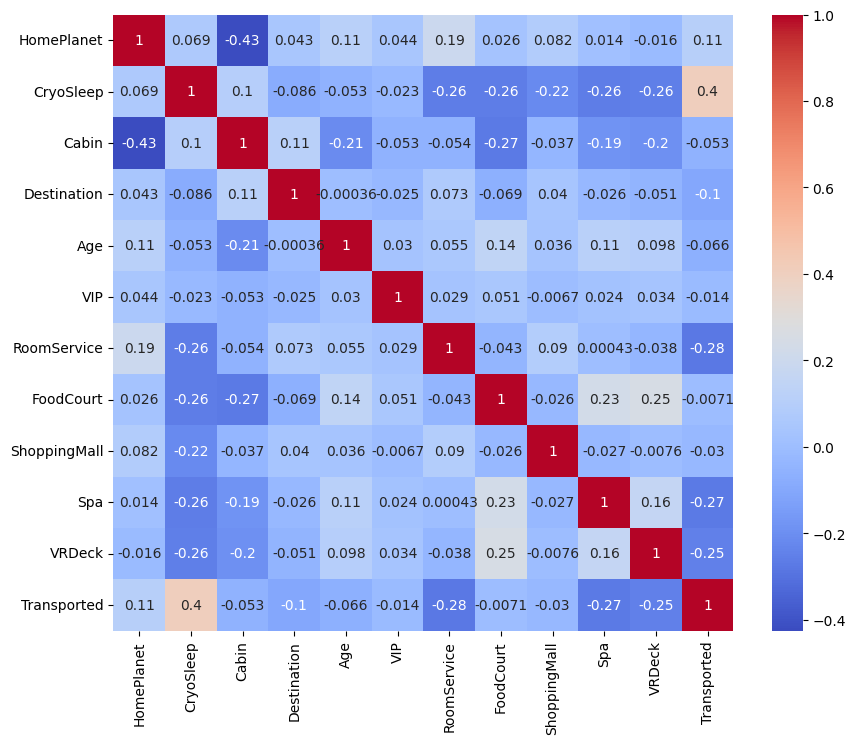

In [ ]:
corr = df.corr()

# Create a heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')

plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from skopt import BayesSearchCV
import pandas as pd

# Function to report best scores
def report(results, n_top=3):
    res = pd.DataFrame(results)
    res = res.sort_values(by=['mean_test_score'], ascending=False)
    res.reset_index(inplace=True, drop=True)

    for candidate in range(n_top):
        print("Model with rank: {0}".format(candidate))
        print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
              res['mean_test_score'][candidate],
              res['std_test_score'][candidate]))
        print("Parameters: {0}".format(res['params'][candidate]))
        print("")

def make_pipeline_fn(model, params, n_iter=5):
    pipeline = make_pipeline(
        StandardScaler(),
        RFE(model),
        model
    )
    bayes_search = BayesSearchCV(pipeline, params, n_iter=n_iter, cv=5, n_jobs=8, random_state=123)
    return bayes_search







In [ ]:

# RandomForestClassifier
rf_params = {
    'randomforestclassifier__n_estimators': (10, 200),
    'randomforestclassifier__max_depth': (3, 10),
    'randomforestclassifier__min_samples_split': (2, 10),
    'randomforestclassifier__min_samples_leaf': (1, 10),
    'randomforestclassifier__max_features': ['auto', 'sqrt', 'log2']
    }
rf = make_pipeline_fn(RandomForestClassifier(), rf_params)
rf.fit(X_train, y_train)
rf_predictions = rf.predict(dft)

In [ ]:
dft.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    4277 non-null   int64  
 1   CryoSleep     4277 non-null   int64  
 2   Cabin         4277 non-null   int64  
 3   Destination   4277 non-null   int64  
 4   Age           4277 non-null   float64
 5   VIP           4277 non-null   int64  
 6   RoomService   4277 non-null   float64
 7   FoodCourt     4277 non-null   float64
 8   ShoppingMall  4277 non-null   float64
 9   Spa           4277 non-null   float64
 10  VRDeck        4277 non-null   float64
dtypes: float64(6), int64(5)
memory usage: 367.7 KB


In [ ]:

# Read the CSV file
dfid  = pd.read_csv(folder_path + 'test1.csv')

testcopy=dfid.copy()

In [ ]:
from google.colab import files


# Read the CSV file
dfid  = pd.read_csv(folder_path + 'test123.csv')

testcopy=dfid.copy()
rf_predictions = rf.predict(dfTest)
submission = pd.DataFrame({
    "PassengerId": testcopy["PassengerId"],
    "Transported": rf_predictions
    })

submission['Transported']=submission['Transported'].astype(bool)

submission.info()
submission.to_csv('submission.csv', index=False)

# download the CSV file
files.download('submission.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  4277 non-null   object
 1   Transported  4277 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 37.7+ KB


In [ ]:
submission.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [ ]:
submission.to_csv('submission.csv', index=False)

# download the CSV file
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>